# Preprocessing Datasets
By [Zahra Taheri](https://github.com/zahta), October 12, 2020

## Import libraries

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from torchvision import transforms

In [2]:
import os

path = os.getcwd()

image_path = path+"\Images"

file_path = path+"\Files"

In [3]:
import imageio

pic_1 = imageio.imread(image_path+"\pic-1.jpeg")
print(pic_1.shape)
type(pic_1)

(124, 220, 3)


imageio.core.util.Array

In [4]:
from PIL import Image

pic_1 = Image.open(image_path+"\pic-1.jpeg")
type(pic_1)

image_arr=np.asarray(pic_1)
print(image_arr.shape)

(124, 220, 3)


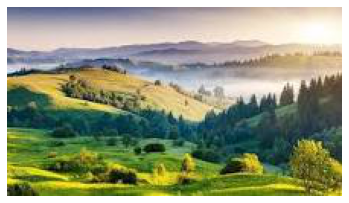

In [5]:
plt.imshow(pic_1)
plt.axis("off")
plt.show()

In [6]:
preprocess = transforms.Compose([transforms.Resize((256,256)),transforms.ToTensor()])
img_t = preprocess(pic_1)
img_t.shape

torch.Size([3, 256, 256])

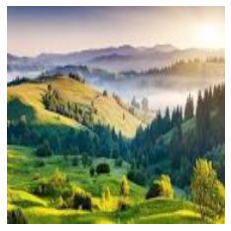

In [7]:
image_t = transforms.functional.to_pil_image(img_t)

plt.imshow(image_t)
plt.axis("off")
plt.show()

In [8]:
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)

In [9]:
list_t = []

preprocess = transforms.Compose([transforms.Resize((256,256)),transforms.ToTensor()])

file_names = [name for name in os.listdir(image_path) if os.path.splitext(name)[-1] == '.jpeg' or '.jpg']

for i, filename in enumerate(file_names):
    image = Image.open(os.path.join(image_path, filename))
    image_t = preprocess(image)
    print(type(image_t))
    
    print(image_t.shape)
   # image_t = image_t.permute(2, 0, 1)
    list_t += [image_t]    
    
images_tensor=torch.stack(list_t)

<class 'torch.Tensor'>
torch.Size([3, 256, 256])
<class 'torch.Tensor'>
torch.Size([3, 256, 256])
<class 'torch.Tensor'>
torch.Size([3, 256, 256])


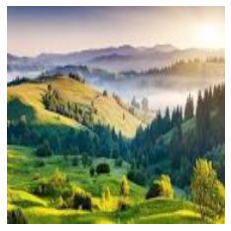

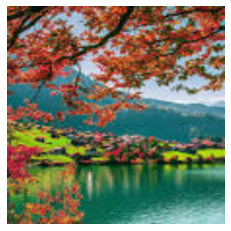

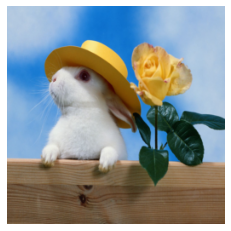

In [10]:
for i in images_tensor:
    image_t = transforms.functional.to_pil_image(i)

    plt.imshow(image_t)
    plt.axis("off")
    plt.show()

In [11]:
#for c in range(3):
#    mean = torch.mean(images_tensor[:, c])
#    std = torch.std(images_tensor[:, c])
#    images_tensor[:, c] = (images_tensor[:, c] - mean) / std

In [12]:
import pandas as pd

df_1 = pd.read_excel(file_path+"\wine-1.xls")
df_1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
241,7.7,0.31,0.26,7.8,0.031,23.0,90.0,0.9944,3.13,0.50,10.4,5
242,7.1,0.21,0.37,2.4,0.026,23.0,100.0,0.9903,3.15,0.38,11.4,7
243,6.8,0.24,0.34,2.7,0.047,64.5,218.5,0.9934,3.30,0.58,9.7,6
244,6.9,0.40,0.56,11.2,0.043,40.0,142.0,0.9975,3.14,0.46,8.7,5


In [13]:
df_2 = pd.read_excel(file_path+"\wine-2.xls")
df_2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.2,0.23,0.39,14.20,0.058,49.0,192,0.9979,2.98,0.48,9.0,7
1,7.2,0.23,0.39,14.20,0.058,49.0,192,0.9979,2.98,0.48,9.0,7
2,7.2,0.23,0.39,14.20,0.058,49.0,192,0.9979,2.98,0.48,9.0,7
3,5.9,0.15,0.31,5.80,0.041,53.0,155,0.9945,3.52,0.46,10.5,6
4,7.4,0.28,0.42,19.80,0.066,53.0,195,1.0000,2.96,0.44,9.1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
125,7.2,0.19,0.39,1.20,0.036,32.0,85,0.9918,3.16,0.50,10.5,5
126,7.2,0.25,0.39,18.95,0.038,42.0,155,0.9999,2.97,0.47,9.0,6
127,7.3,0.28,0.36,12.70,0.040,38.0,140,0.9980,3.30,0.79,9.6,6
128,7.4,0.21,0.27,1.20,0.041,27.0,99,0.9927,3.19,0.33,9.8,6


In [14]:
from torch.utils.data import TensorDataset, DataLoader

def dataset_dataloader(dataframe, batch_size):
    
    df_t = torch.tensor(dataframe.values)
    data = df_t[:,:-1]
    target = df_t[:,-1].long()

    dataset = TensorDataset(data, target) # create your dataset
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True) # create your dataloader
    
    return dataset, data_loader

In [15]:
batch_size = 4
dataset_1, data_loader_1 = dataset_dataloader(pd.read_excel(file_path+"\wine-1.xls"), batch_size)
dataset_1, data_loader_1

(<torch.utils.data.dataset.TensorDataset at 0x2a8d6f130a0>,
 <torch.utils.data.dataloader.DataLoader at 0x2a8d6552820>)

In [16]:
for i, (features, labels) in enumerate(data_loader_1):
    if i==0:
        print(features, labels)

tensor([[7.2000e+00, 3.1000e-01, 5.0000e-01, 1.3300e+01, 5.6000e-02, 6.8000e+01,
         1.9500e+02, 9.9820e-01, 3.0100e+00, 4.7000e-01, 9.2000e+00],
        [7.4000e+00, 3.9000e-01, 2.3000e-01, 7.0000e+00, 3.3000e-02, 2.9000e+01,
         1.2600e+02, 9.9400e-01, 3.1400e+00, 4.2000e-01, 1.0500e+01],
        [6.1000e+00, 3.2000e-01, 2.4000e-01, 1.5000e+00, 3.6000e-02, 3.8000e+01,
         1.2400e+02, 9.8980e-01, 3.2900e+00, 4.2000e-01, 1.2400e+01],
        [6.8000e+00, 2.6000e-01, 5.6000e-01, 1.1900e+01, 4.3000e-02, 6.4000e+01,
         2.2600e+02, 9.9700e-01, 3.0200e+00, 6.3000e-01, 9.3000e+00]],
       dtype=torch.float64) tensor([5, 5, 7, 5])


In [17]:
batch_size = 8
dataset_2, data_loader_2 = dataset_dataloader(pd.read_excel(file_path+"\wine-2.xls"), batch_size)
dataset_2, data_loader_2

(<torch.utils.data.dataset.TensorDataset at 0x2a8d7938cd0>,
 <torch.utils.data.dataloader.DataLoader at 0x2a8d7938e20>)

In [18]:
for i, (features, labels) in enumerate(data_loader_2):
    if i==0:
        print(features, labels)

tensor([[6.1000e+00, 4.1000e-01, 0.0000e+00, 1.6000e+00, 6.3000e-02, 3.6000e+01,
         8.7000e+01, 9.9140e-01, 3.2700e+00, 6.7000e-01, 1.0800e+01],
        [7.2000e+00, 1.9000e-01, 3.9000e-01, 1.2000e+00, 3.6000e-02, 3.2000e+01,
         8.5000e+01, 9.9180e-01, 3.1600e+00, 5.0000e-01, 1.0500e+01],
        [5.8000e+00, 2.8000e-01, 3.4000e-01, 4.0000e+00, 3.1000e-02, 4.0000e+01,
         9.9000e+01, 9.8960e-01, 3.3900e+00, 3.9000e-01, 1.2800e+01],
        [6.7000e+00, 1.7000e-01, 5.0000e-01, 2.1000e+00, 4.3000e-02, 2.7000e+01,
         1.2200e+02, 9.9230e-01, 3.1500e+00, 4.5000e-01, 1.0300e+01],
        [6.8000e+00, 3.7000e-01, 5.1000e-01, 1.1800e+01, 4.4000e-02, 6.2000e+01,
         1.6300e+02, 9.9760e-01, 3.1900e+00, 4.4000e-01, 8.8000e+00],
        [6.8000e+00, 1.5000e-01, 3.0000e-01, 5.3000e+00, 5.0000e-02, 4.0000e+01,
         1.2700e+02, 9.9420e-01, 3.4000e+00, 3.9000e-01, 9.7000e+00],
        [6.3000e+00, 2.3000e-01, 3.0000e-01, 1.8000e+00, 3.3000e-02, 1.6000e+01,
         9.10

In [19]:
df = pd.concat([df_1,df_2], ignore_index=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
371,7.2,0.19,0.39,1.20,0.036,32.0,85.0,0.9918,3.16,0.50,10.5,5
372,7.2,0.25,0.39,18.95,0.038,42.0,155.0,0.9999,2.97,0.47,9.0,6
373,7.3,0.28,0.36,12.70,0.040,38.0,140.0,0.9980,3.30,0.79,9.6,6
374,7.4,0.21,0.27,1.20,0.041,27.0,99.0,0.9927,3.19,0.33,9.8,6


In [20]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.00000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,6.859309,0.285878,0.343457,6.686968,0.048452,37.904255,146.25133,0.994495,3.204601,0.478537,10.088830,5.811170
std,0.761135,0.104924,0.120593,5.387447,0.020801,16.882303,44.03983,0.002760,0.146480,0.104155,1.074918,0.835213
min,5.000000,0.100000,0.000000,0.800000,0.020000,4.000000,47.00000,0.989200,2.870000,0.270000,8.500000,3.000000
25%,6.375000,0.230000,0.270000,1.600000,0.038000,26.000000,114.00000,0.992300,3.110000,0.400000,9.200000,5.000000
50%,6.800000,0.270000,0.340000,5.250000,0.045000,37.000000,146.50000,0.994050,3.190000,0.460000,9.900000,6.000000
75%,7.200000,0.322500,0.400000,10.500000,0.053000,49.000000,172.00000,0.997000,3.300000,0.530000,10.800000,6.000000
max,10.200000,0.905000,0.880000,22.000000,0.200000,131.000000,313.00000,1.001000,3.690000,0.850000,12.800000,8.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         376 non-null    float64
 1   volatile acidity      376 non-null    float64
 2   citric acid           376 non-null    float64
 3   residual sugar        376 non-null    float64
 4   chlorides             376 non-null    float64
 5   free sulfur dioxide   376 non-null    float64
 6   total sulfur dioxide  376 non-null    float64
 7   density               376 non-null    float64
 8   pH                    376 non-null    float64
 9   sulphates             376 non-null    float64
 10  alcohol               376 non-null    float64
 11  quality               376 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 35.4 KB


In [22]:
df_t = torch.tensor(df.values)
df_t

tensor([[ 7.0000,  0.2700,  0.3600,  ...,  0.4500,  8.8000,  6.0000],
        [ 6.3000,  0.3000,  0.3400,  ...,  0.4900,  9.5000,  6.0000],
        [ 8.1000,  0.2800,  0.4000,  ...,  0.4400, 10.1000,  6.0000],
        ...,
        [ 7.3000,  0.2800,  0.3600,  ...,  0.7900,  9.6000,  6.0000],
        [ 7.4000,  0.2100,  0.2700,  ...,  0.3300,  9.8000,  6.0000],
        [ 6.8000,  0.2600,  0.2200,  ...,  0.4700,  9.0000,  5.0000]],
       dtype=torch.float64)

In [23]:
data = df_t[:,:-1]
target = df_t[:,-1].long()
print(data.shape,target.shape)
target

torch.Size([376, 11]) torch.Size([376])


tensor([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 7, 5, 7, 6, 8, 6, 5, 8, 7, 8, 5,
        6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 7, 4, 5,
        6, 5, 6, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 7, 5, 8, 5, 6, 5,
        5, 6, 8, 5, 7, 7, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 7, 7, 7, 6,
        6, 7, 4, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 4, 6, 6, 5, 5,
        5, 5, 5, 6, 6, 6, 5, 7, 7, 6, 5, 7, 5, 5, 5, 5, 6, 5, 7, 6, 5, 5, 6, 6,
        6, 6, 6, 4, 7, 6, 7, 6, 6, 5, 6, 6, 6, 7, 8, 8, 7, 5, 5, 6, 5, 5, 6, 7,
        5, 5, 6, 6, 4, 7, 5, 6, 4, 5, 4, 6, 6, 5, 5, 6, 5, 5, 6, 5, 8, 4, 6, 5,
        6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 4, 5, 5, 4, 5, 6, 5, 7, 5, 6, 7, 5,
        5, 5, 5, 5, 5, 6, 7, 6, 6, 5, 6, 6, 6, 5, 4, 6, 6, 6, 6, 6, 6, 6, 7, 6,
        5, 5, 7, 6, 5, 6, 7, 7, 7, 6, 5, 7, 3, 6, 5, 7, 6, 6, 6, 6, 6, 6, 6, 6,
        5, 6, 7, 6, 7, 8, 6, 6, 5, 6, 6, 5, 7, 6, 7, 5, 6, 6, 5, 5, 6, 6, 6, 5,
        8, 5, 6, 5, 5, 6, 6, 6, 5, 7, 7,

In [24]:
target_onehot = torch.zeros(target.shape[0],10)

target_onehot.scatter_(1, target.unsqueeze(1), 1.0)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [25]:
target_onehot[0]

tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [26]:
target[0]

tensor(6)

In [27]:
#normalizing tabular data

data_mean = torch.mean(data, dim=0)
data_var = torch.var(data, dim=0)
data_normalized = (data - data_mean) / torch.sqrt(data_var) #torch.sqrt(data_var) is the standard deviation
print(data_normalized)

tensor([[ 0.1848, -0.1513,  0.1372,  ..., -1.3968, -0.2740, -1.1990],
        [-0.7348,  0.1346, -0.0287,  ...,  0.6513,  0.1101, -0.5478],
        [ 1.6301, -0.0560,  0.4689,  ...,  0.3782, -0.3700,  0.0104],
        ...,
        [ 0.5790, -0.0560,  0.1372,  ...,  0.6513,  2.9904, -0.4548],
        [ 0.7104, -0.7232, -0.6091,  ..., -0.0997, -1.4261, -0.2687],
        [-0.0779, -0.2466, -1.0238,  ..., -0.7141, -0.0820, -1.0129]],
       dtype=torch.float64)


In [28]:
bad_data = data[target <= 3]
mid_data = data[(target > 3) & (target < 7)]
good_data = data[target >= 7]

bad_mean = torch.mean(bad_data, dim=0)
mid_mean = torch.mean(mid_data, dim=0)
good_mean = torch.mean(good_data, dim=0)
for i, args in enumerate(zip(df.columns[:-1].values, bad_mean, mid_mean, good_mean)):
    print('{:2} {:20} {:6.2f} {:6.2f} {:6.2f}'.format(i, *args))

 0 fixed acidity          9.10   6.93   6.52
 1 volatile acidity       0.59   0.29   0.28
 2 citric acid            0.38   0.34   0.34
 3 residual sugar         1.60   7.35   3.77
 4 chlorides              0.07   0.05   0.04
 5 free sulfur dioxide   34.00  38.95  33.24
 6 total sulfur dioxide 182.00 151.22 123.28
 7 density                1.00   1.00   0.99
 8 pH                     3.23   3.19   3.29
 9 sulphates              0.38   0.48   0.49
10 alcohol                8.50   9.83  11.26


In [29]:
batch_size = 64
dataset, data_loader = dataset_dataloader(pd.concat([pd.read_excel(file_path+"\wine-1.xls"),
                                                     pd.read_excel(file_path+"\wine-2.xls")], ignore_index=True), batch_size)
dataset, data_loader

(<torch.utils.data.dataset.TensorDataset at 0x2a8d7a3d730>,
 <torch.utils.data.dataloader.DataLoader at 0x2a8d7a3d760>)

In [30]:
for i, (features, labels) in enumerate(data_loader):
    if i==0:
        print(features, labels)

tensor([[6.3000e+00, 2.3000e-01, 3.0000e-01, 1.8000e+00, 3.3000e-02, 1.6000e+01,
         9.1000e+01, 9.9060e-01, 3.2800e+00, 4.0000e-01, 1.1800e+01],
        [5.7000e+00, 2.8000e-01, 2.4000e-01, 1.7500e+01, 4.4000e-02, 6.0000e+01,
         1.6700e+02, 9.9890e-01, 3.3100e+00, 4.4000e-01, 9.4000e+00],
        [6.7000e+00, 2.3000e-01, 2.6000e-01, 1.4000e+00, 6.0000e-02, 3.3000e+01,
         1.5400e+02, 9.9340e-01, 3.2400e+00, 5.6000e-01, 9.5000e+00],
        [8.2000e+00, 2.7000e-01, 3.9000e-01, 7.8000e+00, 3.9000e-02, 4.9000e+01,
         2.0800e+02, 9.9760e-01, 3.3100e+00, 5.1000e-01, 9.5000e+00],
        [6.9000e+00, 2.4000e-01, 3.4000e-01, 4.7000e+00, 4.0000e-02, 4.3000e+01,
         1.6100e+02, 9.9350e-01, 3.2000e+00, 5.9000e-01, 1.0600e+01],
        [6.2000e+00, 4.6000e-01, 2.5000e-01, 4.4000e+00, 6.6000e-02, 6.2000e+01,
         2.0700e+02, 9.9390e-01, 3.2500e+00, 5.2000e-01, 9.8000e+00],
        [6.3000e+00, 1.4000e-01, 3.9000e-01, 1.2000e+00, 4.4000e-02, 2.6000e+01,
         1.16